In [14]:
import pandas as pd 

clinical   = pd.read_csv(r"C:\Users\glori\Desktop\Lung-Cancer\Data\clinical_cleaned.csv", sep=",")
clinical.head()
clinical.columns

Index(['project', 'submitter_id', 'morphology', 'days_to_diagnosis',
       'created_datetime', 'tissue_or_organ_of_origin', 'age_at_diagnosis',
       'primary_diagnosis', 'classification_of_tumor', 'tumor_of_origin',
       'updated_datetime', 'diagnosis_id', 'site_of_resection_or_biopsy',
       'state', 'prior_treatment', 'diagnosis_is_primary_disease',
       'synchronous_malignancy', 'ajcc_pathologic_stage', 'laterality',
       'last_known_disease_status', 'prior_malignancy', 'year_of_diagnosis',
       'days_to_last_known_disease_status', 'ajcc_staging_system_edition',
       'ajcc_pathologic_t', 'days_to_recurrence', 'ajcc_pathologic_n',
       'ajcc_pathologic_m', 'residual_disease', 'icd_10_code', 'tumor_grade',
       'progression_or_recurrence', 'NA.', 'sites_of_involvement',
       'figo_stage', 'figo_staging_edition_year', 'exposure_type',
       'alcohol_intensity', 'pack_years_smoked', 'cigarettes_per_day',
       'tobacco_smoking_quit_year', 'tobacco_smoking_status',


In [15]:
# Select 20 clinical variables
clinical_vars = [
    "age_at_diagnosis",
    "gender",
    "race",
    "ethnicity",
    "vital_status",
    "days_to_death",
    "days_to_last_follow_up",
    "tobacco_smoking_status",
    "cigarettes_per_day",
    "pack_years_smoked",
    "tobacco_smoking_quit_year",
    "tobacco_smoking_onset_year",
    "ajcc_pathologic_stage",
    "ajcc_pathologic_t",
    "ajcc_pathologic_n",
    "ajcc_pathologic_m",
    "morphology",
    "primary_diagnosis",
    "year_of_diagnosis",
    "tumor_grade"
]

clinical_selected = clinical[["patient_id"] + clinical_vars]
clinical_selected.head()


,patient_id,age_at_diagnosis,gender,race,ethnicity,vital_status,days_to_death,days_to_last_follow_up,tobacco_smoking_status,cigarettes_per_day,...,tobacco_smoking_quit_year,tobacco_smoking_onset_year,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,morphology,primary_diagnosis,year_of_diagnosis,tumor_grade
0,TCGA-MP-A4SV,24516.0,male,Unknown,Unknown,Dead,2620.0,2620.0,Current Smoker,NaN,...,NaN,1946.0,Stage IB,T2,N0,M0,8140/3,"Adenocarcinoma, NOS",2001.0,NaN
1,TCGA-55-8621,27485.0,female,white,not hispanic or latino,Alive,NaN,515.0,Current Reformed Smoker for < or = 15 yrs,NaN,...,2010.0,1980.0,Stage IA,T1a,N0,MX,8140/3,"Adenocarcinoma, NOS",2012.0,NaN
2,TCGA-MN-A4N1,21939.0,male,black or african american,not hispanic or latino,Alive,NaN,827.0,Current Smoker,NaN,...,NaN,1967.0,Stage IIA,T2a,N1,M0,8140/3,"Adenocarcinoma, NOS",2011.0,NaN
3,TCGA-55-6986,NaN,female,white,not reported,Alive,NaN,3261.0,Lifelong Non-Smoker,NaN,...,NaN,NaN,Stage IB,T2,N0,M0,8252/3,"Bronchiolo-alveolar carcinoma, non-mucinous",2004.0,NaN
4,TCGA-86-6851,26808.0,female,white,not hispanic or latino,Alive,NaN,179.0,Current Smoker,NaN,...,NaN,1959.0,Stage IIA,T1b,N1,M0,8255/3,Adenocarcinoma with mixed subtypes,2011.0,NaN


In [16]:
labels = pd.read_csv("multiomics_labels.tsv", sep="\t")

clinical_labeled = clinical_selected.merge(labels, on="patient_id")
clinical_labeled.shape, clinical_labeled.head()


((831, 23),
      patient_id  age_at_diagnosis  gender                       race  \
 0  TCGA-MP-A4SV           24516.0    male                    Unknown   
 1  TCGA-55-8621           27485.0  female                      white   
 2  TCGA-MN-A4N1           21939.0    male  black or african american   
 3  TCGA-55-6986               NaN  female                      white   
 4  TCGA-86-6851           26808.0  female                      white   
 
                 ethnicity vital_status  days_to_death  days_to_last_follow_up  \
 0                 Unknown         Dead         2620.0                  2620.0   
 1  not hispanic or latino        Alive            NaN                   515.0   
 2  not hispanic or latino        Alive            NaN                   827.0   
 3            not reported        Alive            NaN                  3261.0   
 4  not hispanic or latino        Alive            NaN                   179.0   
 
                       tobacco_smoking_status  cigaret

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate X and y
X_clin = clinical_labeled.drop(columns=["patient_id", "subtype", "subtype_simple"])
y_clin_str = clinical_labeled["subtype_simple"]

# Identify categorical and numeric columns
categorical_cols = X_clin.select_dtypes(include=["object"]).columns.tolist()
numeric_cols     = X_clin.select_dtypes(exclude=["object"]).columns.tolist()

# Preprocessing pipeline
preprocess_clin = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols)
    ]
)

# Build final pipeline (we will reuse this for each model)


In [20]:
X_train_clin, X_test_clin, y_train_clin, y_test_clin = train_test_split(
    X_clin, y_clin_str,
    test_size=0.2,
    stratify=y_clin_str,
    random_state=42
)


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1) Re-identify numeric & categorical columns (in case session changed)
categorical_cols = X_clin.select_dtypes(include=["object"]).columns.tolist()
numeric_cols     = X_clin.select_dtypes(exclude=["object"]).columns.tolist()

# 2) Preprocessing with DENSE OneHotEncoder
#    NOTE: if 'sparse_output' gives an error, replace it with 'sparse=False'
preprocess_clin = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(
                handle_unknown="ignore",
                sparse_output=False  # use sparse=False if your sklearn is older
            ))
        ]), categorical_cols)
    ]
)

# 3) LDA pipeline
lda_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),
    ("model", LinearDiscriminantAnalysis())
])

# 4) Fit
lda_clin.fit(X_train_clin, y_train_clin)


c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred_lda_clin  = lda_clin.predict(X_test_clin)
y_proba_lda_clin = lda_clin.predict_proba(X_test_clin)[:, 1]

# Accuracy
acc_lda_clin = accuracy_score(y_test_clin, y_pred_lda_clin)
print("Clinical LDA Accuracy:", acc_lda_clin)

print("\nClassification Report:\n",
      classification_report(y_test_clin, y_pred_lda_clin))

# Confusion matrix
cm_lda_clin = confusion_matrix(y_test_clin, y_pred_lda_clin)
print("\nConfusion Matrix:\n", cm_lda_clin)

Clinical LDA Accuracy: 0.9341317365269461

Classification Report:
               precision    recall  f1-score   support

        LUAD       0.94      0.95      0.94        92
        LUSC       0.93      0.92      0.93        75

    accuracy                           0.93       167
   macro avg       0.93      0.93      0.93       167
weighted avg       0.93      0.93      0.93       167


Confusion Matrix:
 [[87  5]
 [ 6 69]]


c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Clinical LDA AUC: 0.9262318840579711


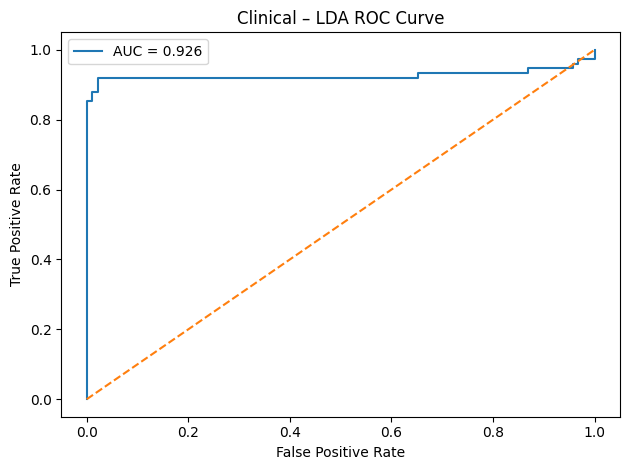

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Convert string labels to 0/1: LUSC = 1, LUAD = 0
y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

# AUC
auc_lda_clin = roc_auc_score(y_test_clin_bin, y_proba_lda_clin)
print("Clinical LDA AUC:", auc_lda_clin)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_lda_clin)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_lda_clin:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical – LDA ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),            # same preprocessing
    ("model", KNeighborsClassifier(n_neighbors=5))
])


In [28]:
knn_clin.fit(X_train_clin, y_train_clin)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred_knn_clin = knn_clin.predict(X_test_clin)
y_proba_knn_clin = knn_clin.predict_proba(X_test_clin)[:, 1]   # probability for class LUSC

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [30]:
from sklearn.metrics import accuracy_score, classification_report

acc_knn_clin = accuracy_score(y_test_clin, y_pred_knn_clin)
print("Clinical KNN Accuracy:", acc_knn_clin)

print("\nClassification Report:\n")
print(classification_report(y_test_clin, y_pred_knn_clin))


Clinical KNN Accuracy: 0.9281437125748503

Classification Report:

              precision    recall  f1-score   support

        LUAD       0.97      0.90      0.93        92
        LUSC       0.89      0.96      0.92        75

    accuracy                           0.93       167
   macro avg       0.93      0.93      0.93       167
weighted avg       0.93      0.93      0.93       167




Confusion Matrix:
 [[83  9]
 [ 3 72]]


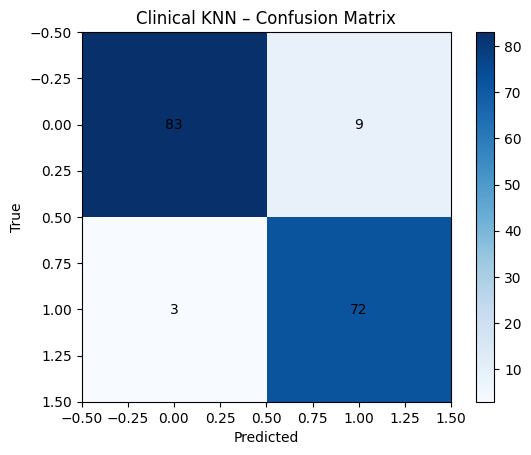

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_knn_clin = confusion_matrix(y_test_clin, y_pred_knn_clin)
print("\nConfusion Matrix:\n", cm_knn_clin)

plt.imshow(cm_knn_clin, cmap="Blues")
plt.colorbar()
plt.title("Clinical KNN – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm_knn_clin.shape[0]):
    for j in range(cm_knn_clin.shape[1]):
        plt.text(j, i, cm_knn_clin[i, j], ha="center", va="center")

plt.show()


Clinical KNN AUC: 0.9753623188405798


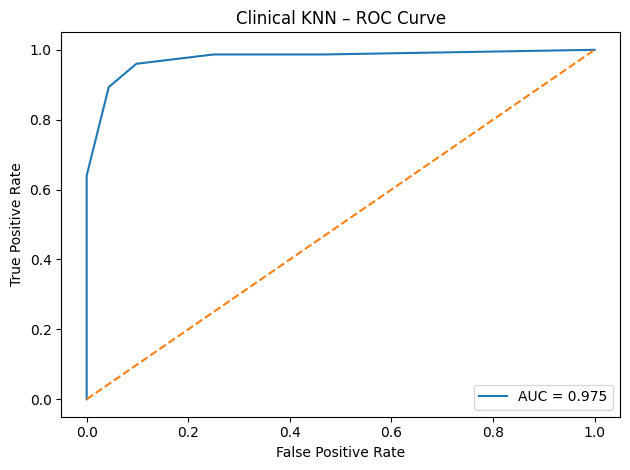

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# convert LUAD/LUSC → 0/1
y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

auc_knn_clin = roc_auc_score(y_test_clin_bin, y_proba_knn_clin)
print("Clinical KNN AUC:", auc_knn_clin)

fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_knn_clin)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_knn_clin:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical KNN – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),
    ("model", GaussianNB())
])

nb_clin.fit(X_train_clin, y_train_clin)


c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_pred_nb_clin  = nb_clin.predict(X_test_clin)
y_proba_nb_clin = nb_clin.predict_proba(X_test_clin)[:, 1]   # P(LUSC)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score, classification_report

acc_nb_clin = accuracy_score(y_test_clin, y_pred_nb_clin)
print("Clinical Naive Bayes Accuracy:", acc_nb_clin)

print("\nClassification Report (Clinical – NB):\n")
print(classification_report(y_test_clin, y_pred_nb_clin))

Clinical Naive Bayes Accuracy: 0.9940119760479041

Classification Report (Clinical – NB):

              precision    recall  f1-score   support

        LUAD       0.99      1.00      0.99        92
        LUSC       1.00      0.99      0.99        75

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167




Confusion Matrix (Clinical – NB):
 [[92  0]
 [ 1 74]]


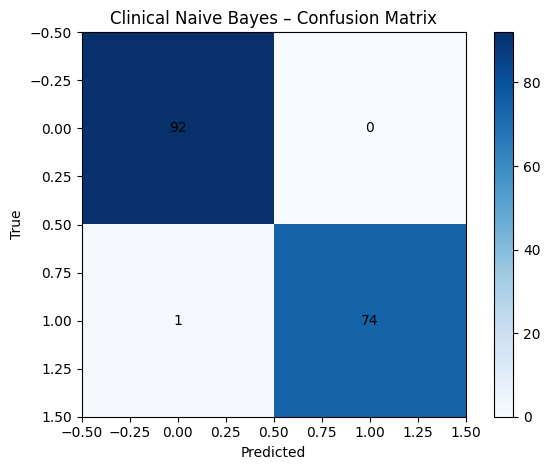

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_nb_clin = confusion_matrix(y_test_clin, y_pred_nb_clin)
print("\nConfusion Matrix (Clinical – NB):\n", cm_nb_clin)

plt.figure()
plt.imshow(cm_nb_clin, cmap="Blues")
plt.colorbar()
plt.title("Clinical Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(cm_nb_clin.shape[0]):
    for j in range(cm_nb_clin.shape[1]):
        plt.text(j, i, cm_nb_clin[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()


Clinical Naive Bayes AUC: 0.9933333333333334


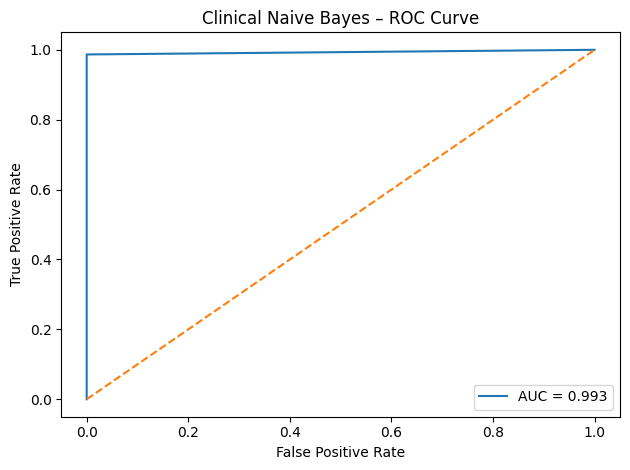

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Convert labels to 0/1: LUSC = 1, LUAD = 0
y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

auc_nb_clin = roc_auc_score(y_test_clin_bin, y_proba_nb_clin)
print("Clinical Naive Bayes AUC:", auc_nb_clin)

fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_nb_clin)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_nb_clin:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical Naive Bayes – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# Decision Tree (CART)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),        
    ("model", DecisionTreeClassifier(
        criterion="gini",
        max_depth=None,
        random_state=42
    ))
])

dt_clin.fit(X_train_clin, y_train_clin)


c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
y_pred_dt_clin = dt_clin.predict(X_test_clin)
y_proba_dt_clin = dt_clin.predict_proba(X_test_clin)[:, 1]  # P(LUSC)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [41]:
from sklearn.metrics import accuracy_score, classification_report

acc_dt_clin = accuracy_score(y_test_clin, y_pred_dt_clin)
print("Clinical Decision Tree Accuracy:", acc_dt_clin)

print("\nClassification Report (Clinical – Decision Tree):\n")
print(classification_report(y_test_clin, y_pred_dt_clin))

Clinical Decision Tree Accuracy: 0.9940119760479041

Classification Report (Clinical – Decision Tree):

              precision    recall  f1-score   support

        LUAD       0.99      1.00      0.99        92
        LUSC       1.00      0.99      0.99        75

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167




Confusion Matrix (Clinical – Decision Tree):
 [[92  0]
 [ 1 74]]


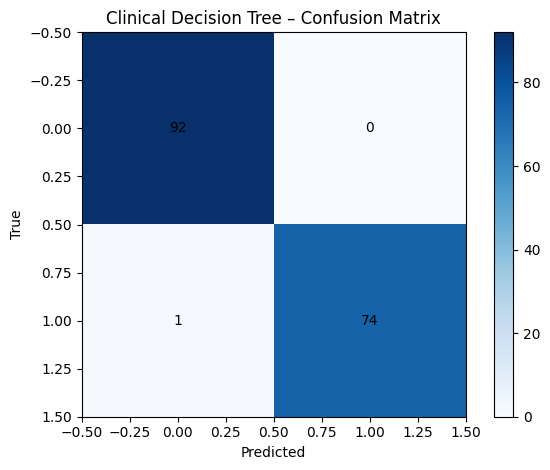

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_dt_clin = confusion_matrix(y_test_clin, y_pred_dt_clin)
print("\nConfusion Matrix (Clinical – Decision Tree):\n", cm_dt_clin)

plt.figure()
plt.imshow(cm_dt_clin, cmap="Blues")
plt.colorbar()
plt.title("Clinical Decision Tree – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm_dt_clin.shape[0]):
    for j in range(cm_dt_clin.shape[1]):
        plt.text(j, i, cm_dt_clin[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


Clinical Decision Tree AUC: 0.9933333333333334


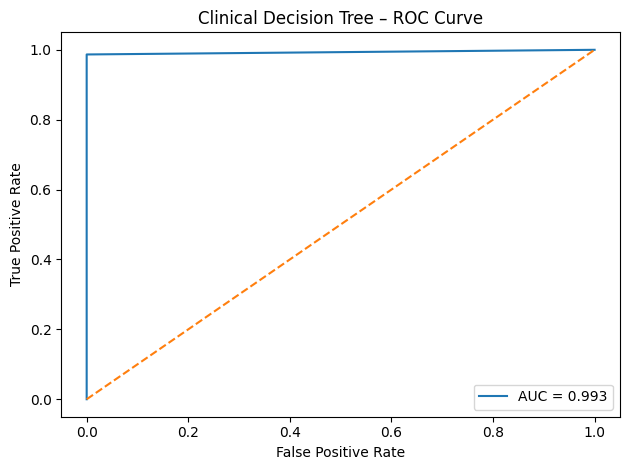

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

auc_dt_clin = roc_auc_score(y_test_clin_bin, y_proba_dt_clin)
print("Clinical Decision Tree AUC:", auc_dt_clin)

fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_dt_clin)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_dt_clin:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical Decision Tree – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# SVM

In [44]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),
    ("model", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        probability=True,
        random_state=42
    ))
])

svm_clin.fit(X_train_clin, y_train_clin)


c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
y_pred_svm_clin  = svm_clin.predict(X_test_clin)
y_proba_svm_clin = svm_clin.predict_proba(X_test_clin)[:, 1]   # P(LUSC)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [46]:
from sklearn.metrics import accuracy_score, classification_report

acc_svm_clin = accuracy_score(y_test_clin, y_pred_svm_clin)
print("Clinical SVM Accuracy:", acc_svm_clin)

print("\nClassification Report (Clinical – SVM):\n")
print(classification_report(y_test_clin, y_pred_svm_clin))

Clinical SVM Accuracy: 0.9880239520958084

Classification Report (Clinical – SVM):

              precision    recall  f1-score   support

        LUAD       0.98      1.00      0.99        92
        LUSC       1.00      0.97      0.99        75

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167




Confusion Matrix (Clinical – SVM):
 [[92  0]
 [ 2 73]]


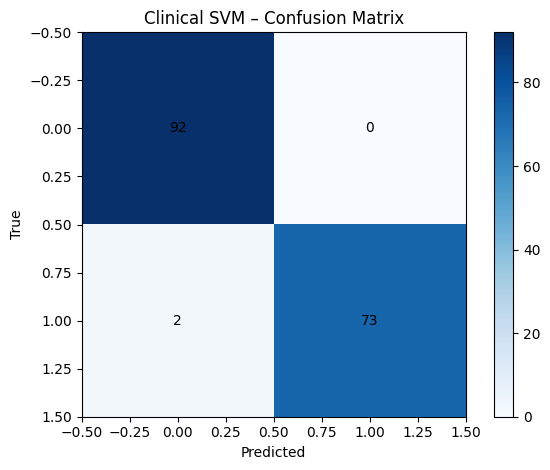

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_svm_clin = confusion_matrix(y_test_clin, y_pred_svm_clin)
print("\nConfusion Matrix (Clinical – SVM):\n", cm_svm_clin)

plt.figure()
plt.imshow(cm_svm_clin, cmap="Blues")
plt.colorbar()
plt.title("Clinical SVM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm_svm_clin.shape[0]):
    for j in range(cm_svm_clin.shape[1]):
        plt.text(j, i, cm_svm_clin[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


Clinical SVM AUC: 0.9913043478260869


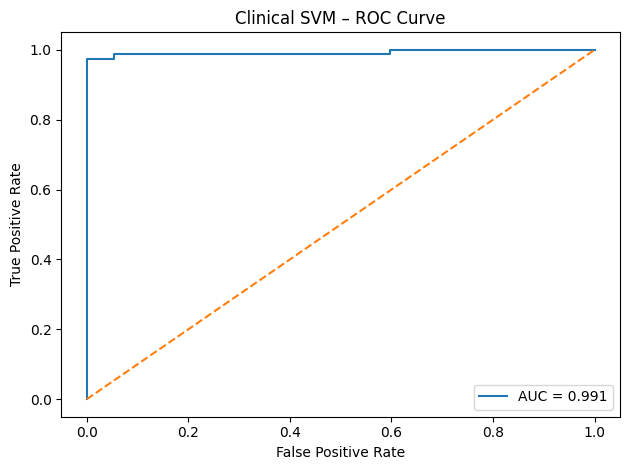

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Convert to 0/1: LUSC = 1, LUAD = 0
y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

auc_svm_clin = roc_auc_score(y_test_clin_bin, y_proba_svm_clin)
print("Clinical SVM AUC:", auc_svm_clin)

fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_svm_clin)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_svm_clin:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical SVM – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_clin = Pipeline(steps=[
    ("preprocess", preprocess_clin),
    ("model", LogisticRegression(
        penalty="l2",
        solver="saga",
        max_iter=5000,
        n_jobs=-1
    ))
])

logreg_clin.fit(X_train_clin, y_train_clin)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
y_pred_logreg_clin  = logreg_clin.predict(X_test_clin)
y_proba_logreg_clin = logreg_clin.predict_proba(X_test_clin)[:, 1]   # P(LUSC)

c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\glori\.conda\envs\prompEng310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['cigarettes_per_day' 'tumor_grade']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [51]:
from sklearn.metrics import accuracy_score, classification_report

acc_logreg_clin = accuracy_score(y_test_clin, y_pred_logreg_clin)
print("Clinical Logistic Regression Accuracy:", acc_logreg_clin)

print("\nClassification Report (Clinical – Logistic Regression):\n")
print(classification_report(y_test_clin, y_pred_logreg_clin))


Clinical Logistic Regression Accuracy: 0.9880239520958084

Classification Report (Clinical – Logistic Regression):

              precision    recall  f1-score   support

        LUAD       0.98      1.00      0.99        92
        LUSC       1.00      0.97      0.99        75

    accuracy                           0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167




Confusion Matrix (Clinical – Logistic Regression):
 [[92  0]
 [ 2 73]]


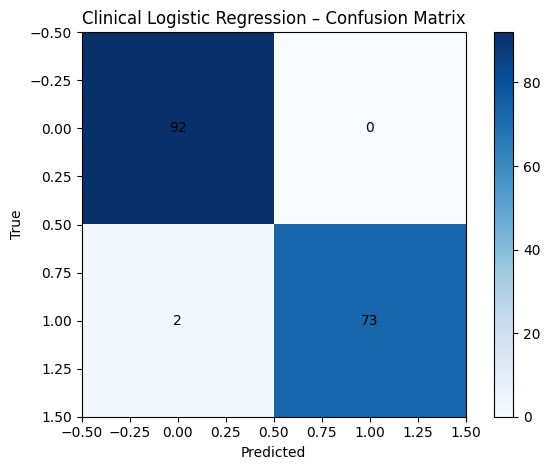

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_logreg_clin = confusion_matrix(y_test_clin, y_pred_logreg_clin)
print("\nConfusion Matrix (Clinical – Logistic Regression):\n", cm_logreg_clin)

plt.figure()
plt.imshow(cm_logreg_clin, cmap="Blues")
plt.colorbar()
plt.title("Clinical Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(cm_logreg_clin.shape[0]):
    for j in range(cm_logreg_clin.shape[1]):
        plt.text(j, i, cm_logreg_clin[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


Clinical Logistic Regression AUC: 0.9891304347826088


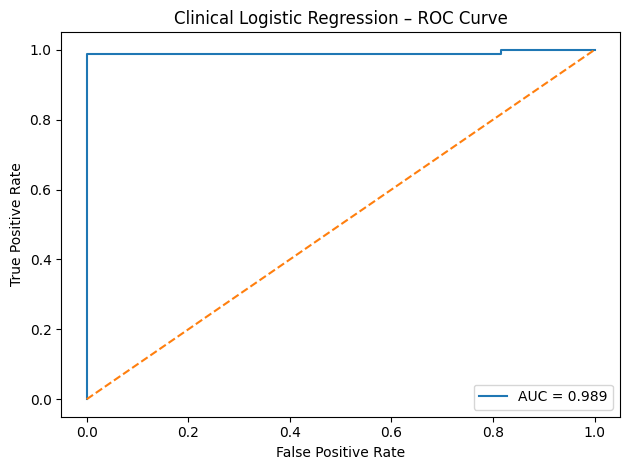

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Convert labels: LUSC = 1, LUAD = 0
y_test_clin_bin = (y_test_clin == "LUSC").astype(int)

auc_logreg_clin = roc_auc_score(y_test_clin_bin, y_proba_logreg_clin)
print("Clinical Logistic Regression AUC:", auc_logreg_clin)

fpr, tpr, thresholds = roc_curve(y_test_clin_bin, y_proba_logreg_clin)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_logreg_clin:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Clinical Logistic Regression – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd

clinical_results = {
    "Model": [
        "LDA",
        "KNN (k=5)",
        "Naive Bayes",
        "Decision Tree",
        "SVM (RBF)",
        "Logistic Regression"
    ],
    "Accuracy": [
        acc_lda_clin,
        acc_knn_clin,
        acc_nb_clin,
        acc_dt_clin,
        acc_svm_clin,
        acc_logreg_clin
    ],
    "AUC": [
        auc_lda_clin,
        auc_knn_clin,
        auc_nb_clin,
        auc_dt_clin,
        auc_svm_clin,
        auc_logreg_clin
    ]
}

clinical_results_df = pd.DataFrame(clinical_results)
print(clinical_results_df)

# Optionally save:
clinical_results_df.to_csv("clinical_unimodal_results.csv", index=False)


                 Model  Accuracy       AUC
0                  LDA  0.934132  0.926232
1            KNN (k=5)  0.928144  0.975362
2          Naive Bayes  0.994012  0.993333
3        Decision Tree  0.994012  0.993333
4            SVM (RBF)  0.988024  0.991304
5  Logistic Regression  0.988024  0.989130
